# Predicting Survival

Building Classifier Model on *Titanic-Dataset.csv* to predict survival

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/vishwak05/Gradious-Assignments/refs/heads/main/ML%20Algo/Assignment-3/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Finding na values
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Numeric columns
num_cols = ['Age', 'Fare']

# Categorical Columns
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Survived']

In [7]:
# Dropping rows with na values in embarked feature
data.dropna(subset=['Embarked'], inplace=True)

In [8]:
# Filling na values in cabin feature as Unknown
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [9]:
# Finding the indexes where data['Age'] is na
data[data['Age'].isna()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [10]:
# Filling na values in data['Age'] with median values of groupby Pclass, Sex, Survived
age_values = data.groupby(['Pclass', 'Sex', 'Survived'])['Age'].median()
age_values

Pclass  Sex     Survived
1       female  0           25.0
                1           35.0
        male    0           45.5
                1           36.0
2       female  0           32.5
                1           28.0
        male    0           30.5
                1            3.0
3       female  0           22.0
                1           19.0
        male    0           25.0
                1           25.0
Name: Age, dtype: float64

In [11]:
for i, row in data[data['Age'].isna()].iterrows():
    data.at[i, 'Age'] = age_values.loc[(row['Pclass'], row['Sex'], row['Survived'])]

In [12]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
# Analyzing columns and unique values
for col in data.columns:
    print(data[col].value_counts(), end='\n\n')

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
14     1
13     1
12     1
11     1
10     1
Name: count, Length: 889, dtype: int64

Survived
0    549
1    340
Name: count, dtype: int64

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Sandstrom, Miss. Marguerite Rut                        1
Nasser, Mrs. Nicholas (Adele Achem)                    1
Name: count, Length: 889, dtype: int64

Sex
male      577
female    312
Name: count, dtype: int64

Age

In [14]:
# Creating CabinClass with 1st letter of Cabin
data['CabinClass'] = data['Cabin'].astype(str).str.get(0)
data['CabinClass'].value_counts()

,count
CabinClass,
U,687
C,59
B,45
D,33
E,32
A,15
F,13
G,4
T,1


In [15]:
# Summation of Parch, SibSp and passenger
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

In [16]:
# ordering cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [17]:
# Creating a fare class using k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
data['FareClass'] = kmeans.fit_predict(data[['Fare']])
data = order_cluster('FareClass', 'Fare', data, True)
data.groupby('FareClass')['Fare'].describe().T

FareClass,0,1,2,3,4
count,536.000000,233.000000,89.000000,28.000000,3.0000
mean,10.162546,34.279417,87.912217,204.948064,512.3292
std,4.172994,10.703100,20.517639,45.373543,0.0000
min,0.000000,22.358300,61.175000,146.520800,512.3292
25%,7.750000,26.000000,73.500000,153.462500,512.3292
50%,8.050000,30.000000,79.650000,211.418750,512.3292
75%,13.000000,39.687500,93.500000,247.520800,512.3292
max,22.025000,59.400000,135.633300,263.000000,512.3292


In [18]:
# Encoding categorical fields
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data['CabinClass'] = encoder.fit_transform(data['CabinClass'])

In [19]:
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinClass,FamilySize,FareClass
0,0,3,1,22.0,1,0,7.2500,2,8,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,2,2
2,1,3,0,26.0,0,0,7.9250,2,8,1,0
3,1,1,0,35.0,1,0,53.1000,2,2,2,1
4,0,3,1,35.0,0,0,8.0500,2,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,2,8,1,0
885,1,1,0,19.0,0,0,30.0000,2,1,1,1
886,0,3,0,22.0,1,2,23.4500,2,8,4,1
887,1,1,1,26.0,0,0,30.0000,0,2,1,1


In [20]:
num_cols = ['Age', 'Fare', 'FamilySize']
cat_cols = ['Pclass', 'Sex', 'Embarked', 'CabinClass', 'FareClass', 'Survived']

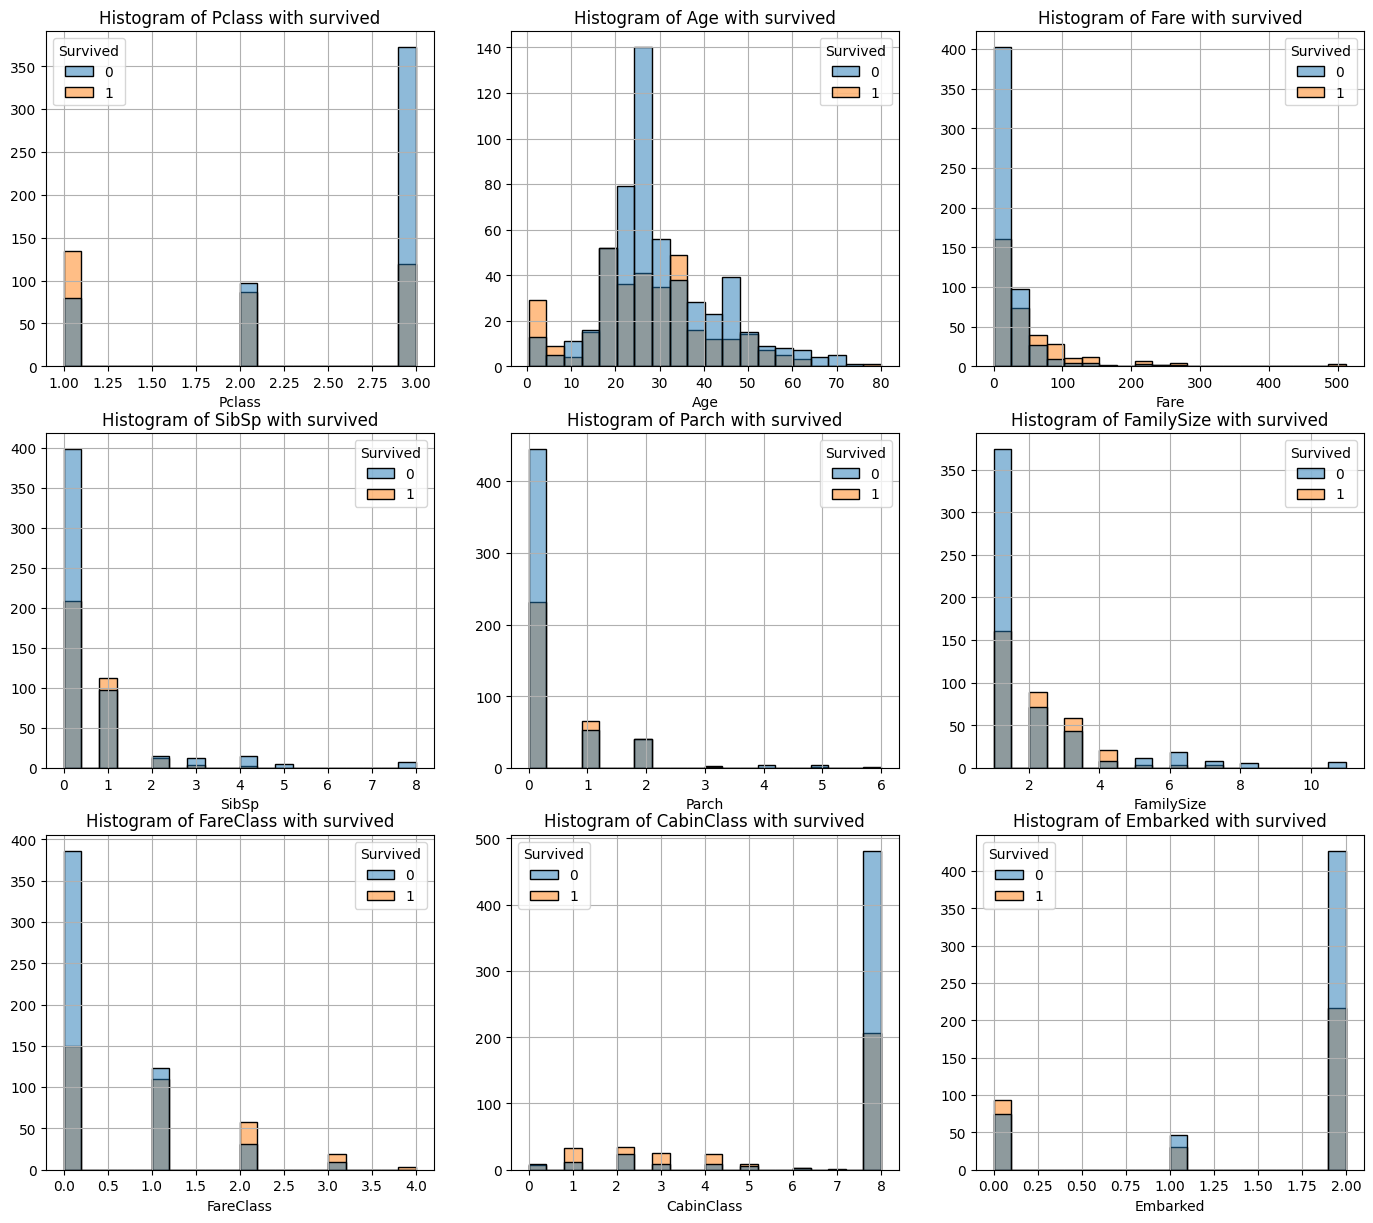

In [21]:
# Histogram of cols with survived
hist_cols = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'FareClass', 'CabinClass', 'Embarked']
plt.figure(figsize=(17,20))

for i, col in enumerate(hist_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(data=data, x=col, bins=20, hue='Survived')
    plt.xlabel(col)
    plt.ylabel('')
    plt.grid(True)
    plt.title(f'Histogram of {col} with survived')
plt.show()

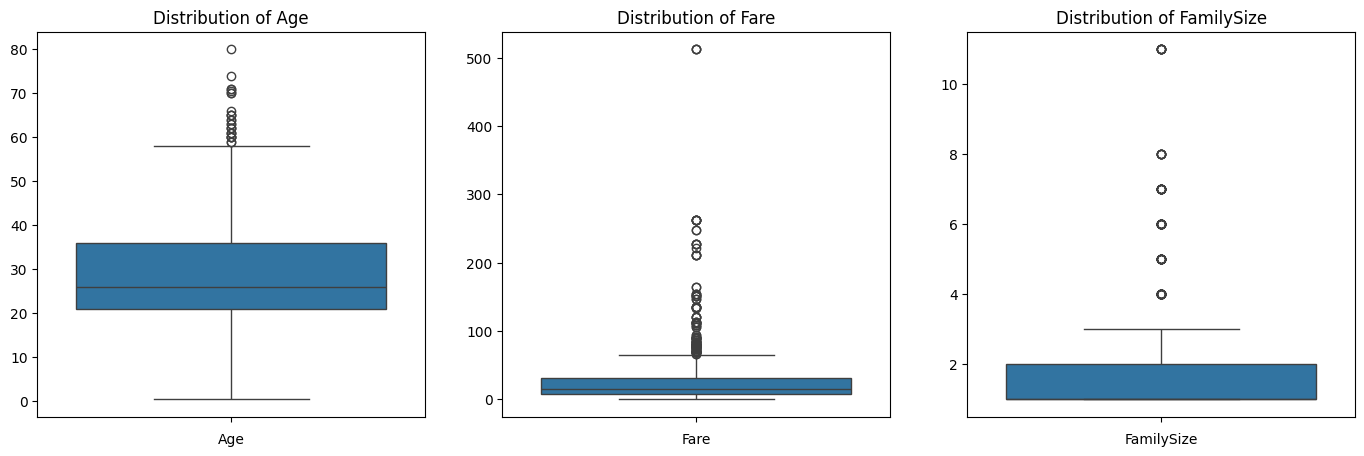

In [22]:
# Distribution of numeric cols

plt.figure(figsize=(17, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
plt.show()

Text(0.5, 1.0, 'Scatter plot of Age and Fare')

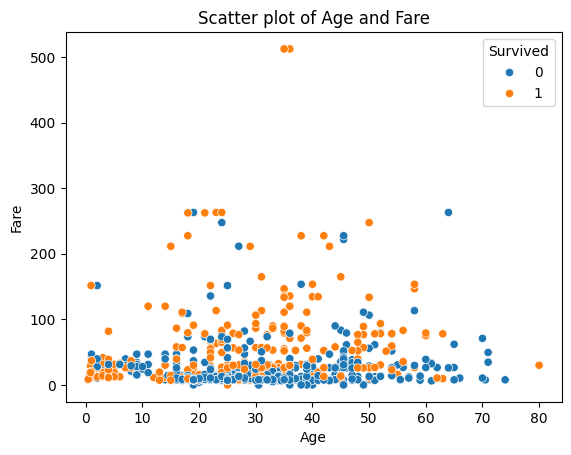

In [23]:
# Scatter plot of Age and Fare
sns.scatterplot(x=data['Age'], y=data['Fare'], hue=data['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age and Fare')

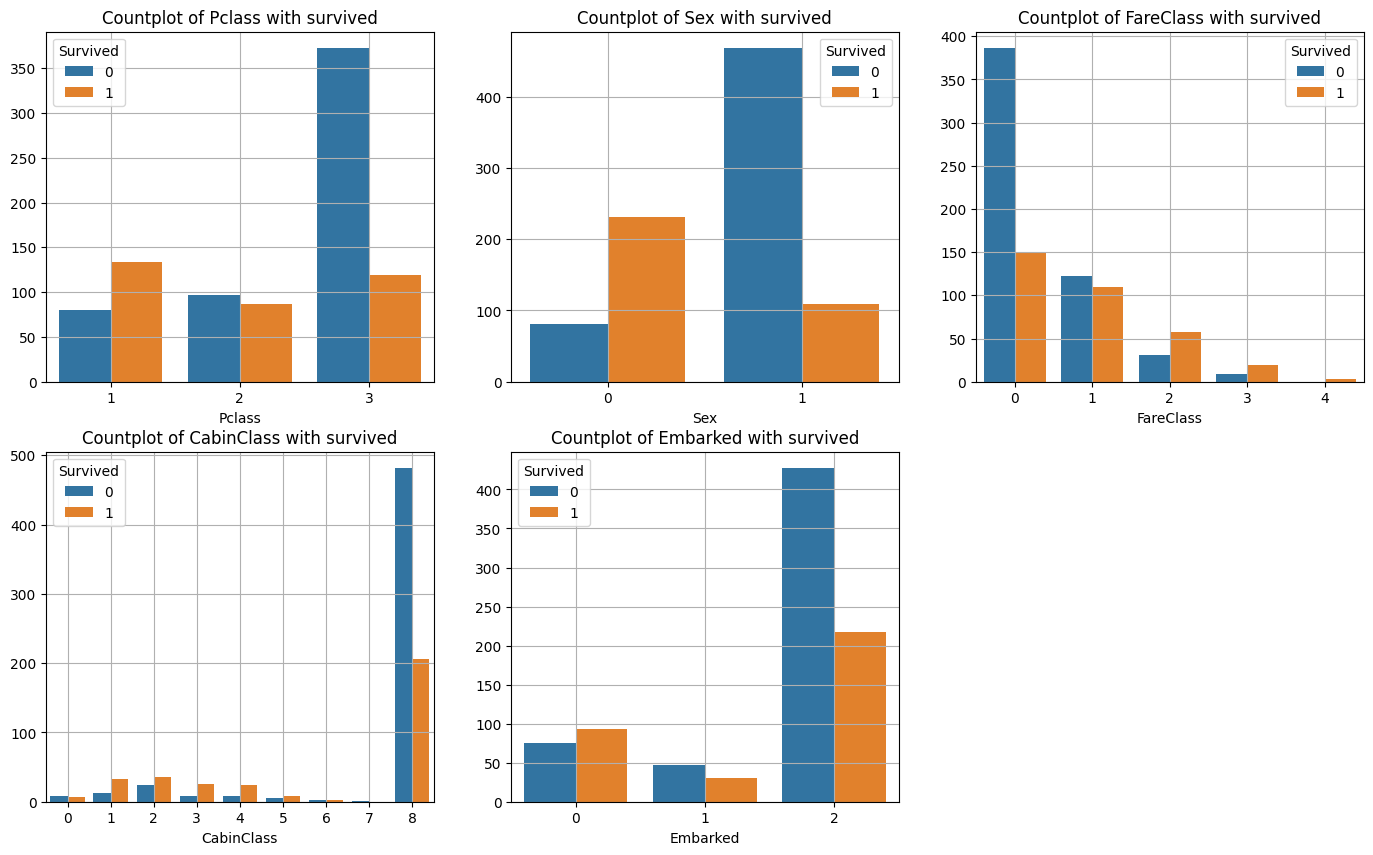

In [24]:
# Count plots of categorical fields with survived
count_cols = ['Pclass', 'Sex', 'FareClass', 'CabinClass', 'Embarked']
plt.figure(figsize=(17,10))

for i, col in enumerate(count_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data, x=col, hue='Survived')
    plt.xlabel(col)
    plt.ylabel('')
    plt.grid(True)
    plt.title(f'Countplot of {col} with survived')
plt.show()

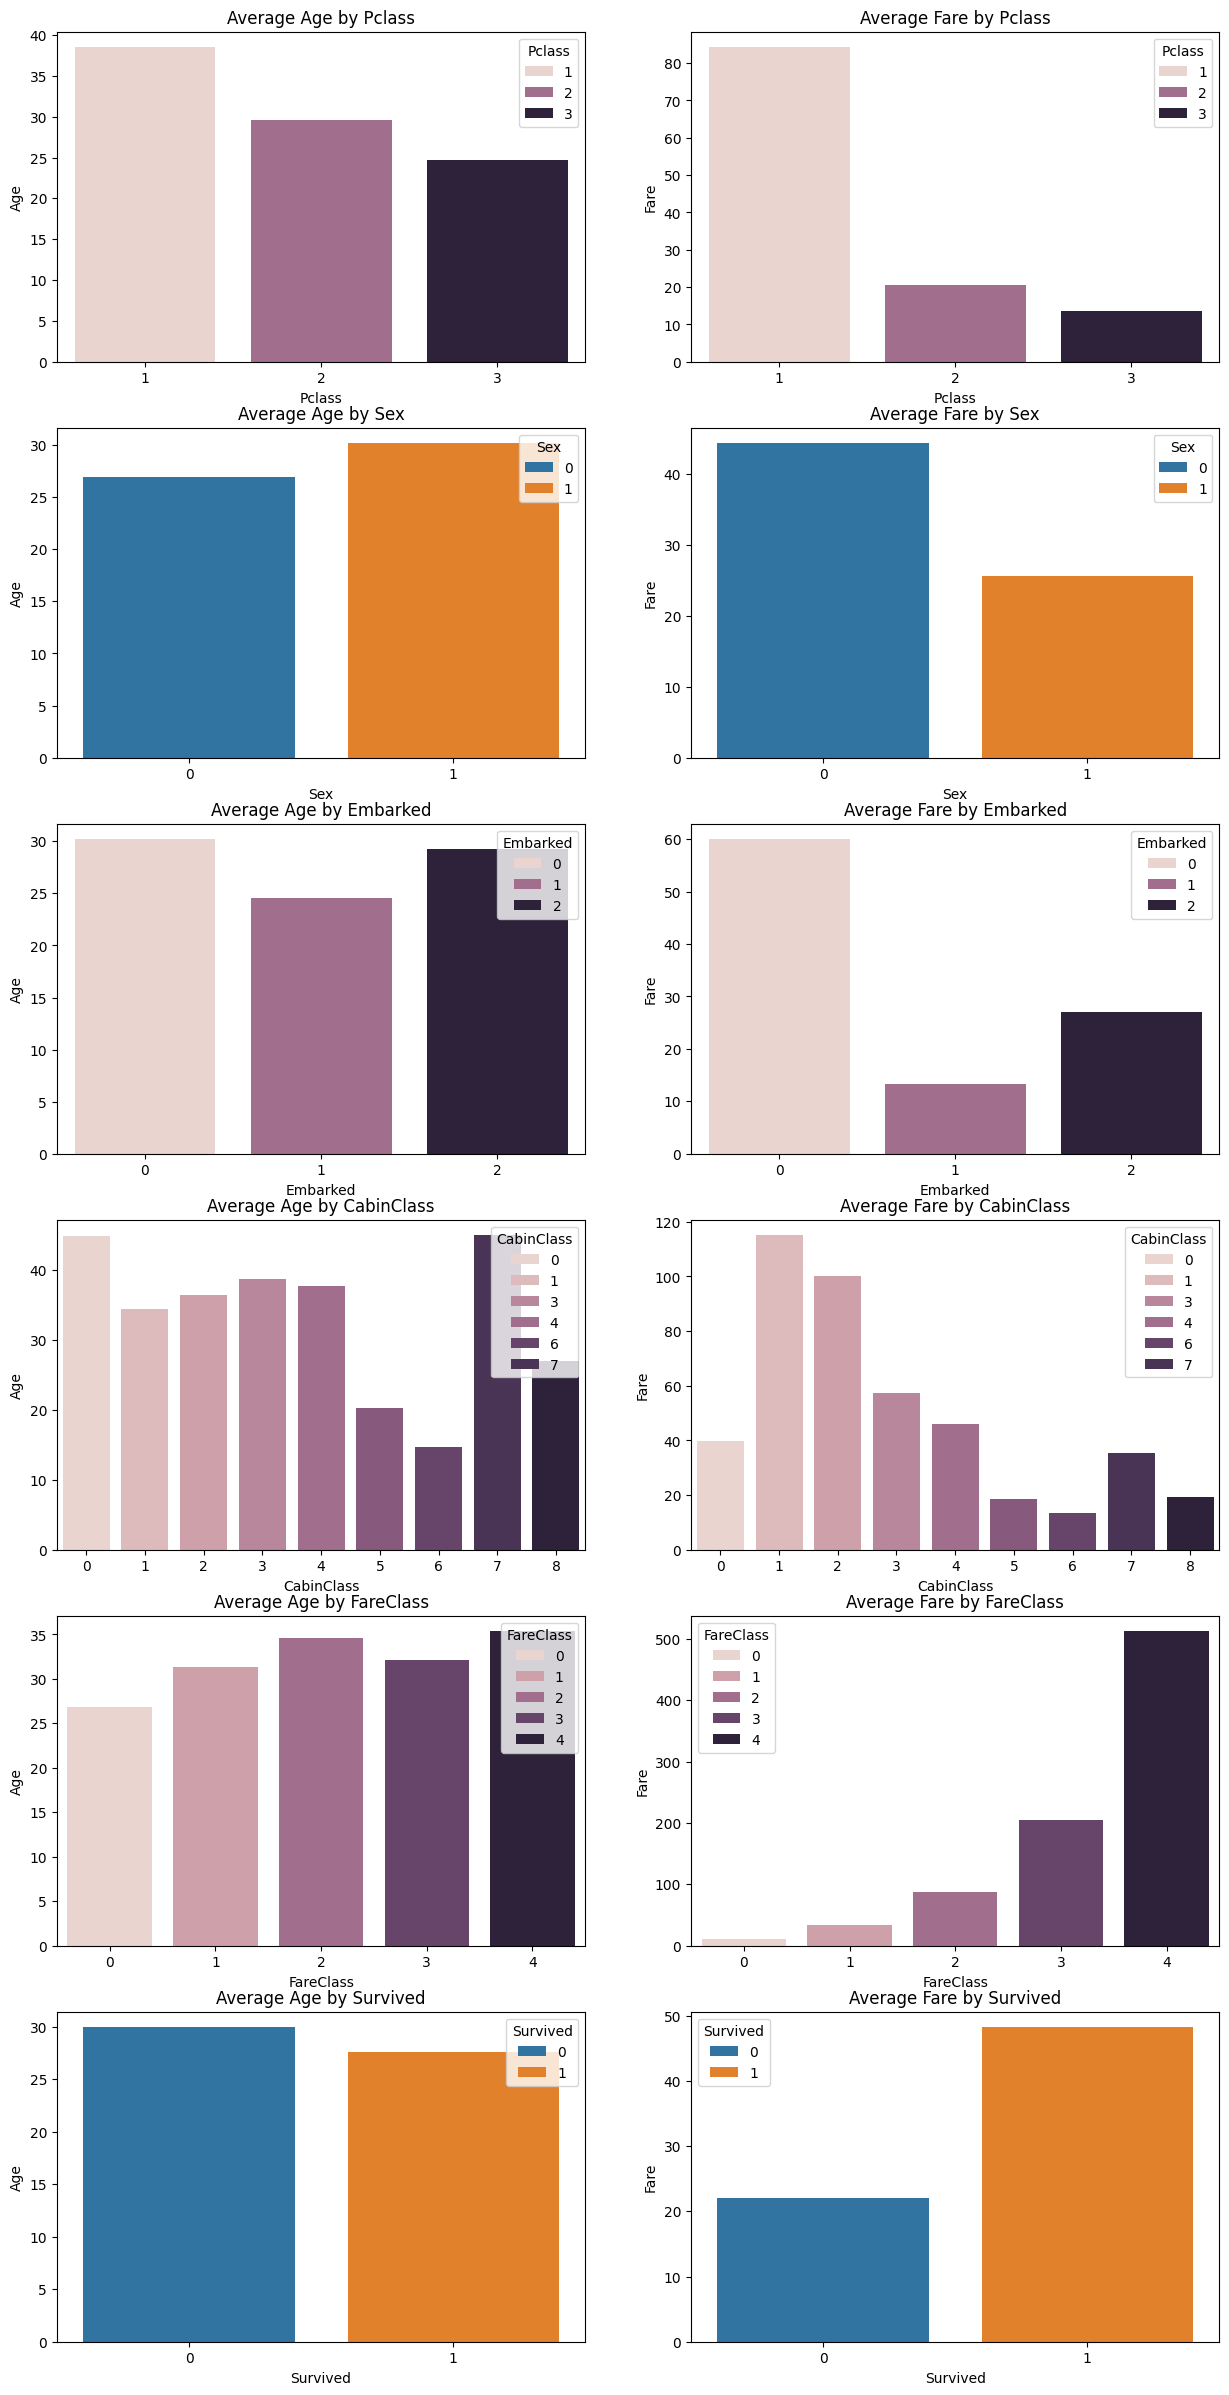

In [25]:
# Average Age and Fare for categorical columns
plt.figure(figsize=(15, 30))
i = 1

for col in cat_cols:
    plt.subplot(6, 2, i)
    sns.barplot(x=col, y='Age', data=data, hue=col, errorbar=None)
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.title(f'Average Age by {col}')
    i += 1

    plt.subplot(6, 2, i)
    sns.barplot(x=col, y='Fare', data=data, hue=col, errorbar=None)
    plt.xlabel(col)
    plt.ylabel('Fare')
    plt.title(f'Average Fare by {col}')
    i += 1
plt.show()

In [26]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'CabinClass', 'FamilySize', 'FareClass'],
      dtype='object')

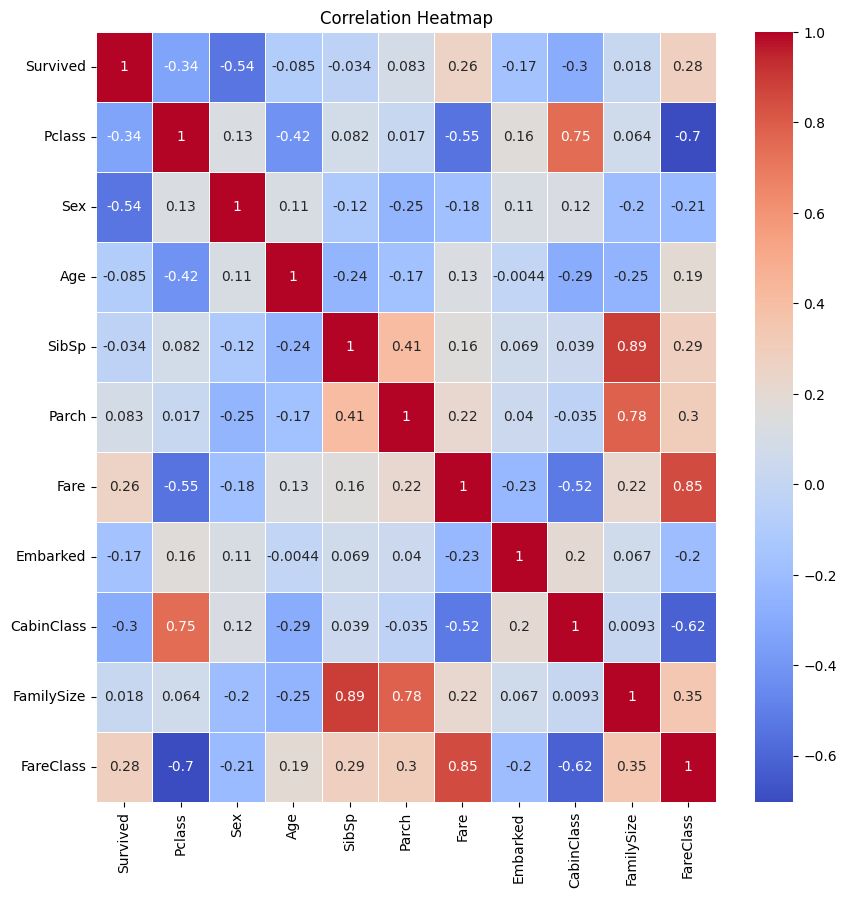

In [27]:
# Correlation heatmap of all fields
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Scaling numeric fields
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [29]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinClass,FamilySize,FareClass
0,0,3,1,-0.522349,1,0,-0.500240,2,8,0.057853,0
1,1,1,0,0.667448,1,0,0.788947,0,2,0.057853,2
2,1,3,0,-0.224899,0,0,-0.486650,2,8,-0.561804,0
3,1,1,0,0.444361,1,0,0.422861,2,2,0.057853,1
4,0,3,1,0.444361,0,0,-0.484133,2,8,-0.561804,0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,-0.150537,0,0,-0.384475,2,8,-0.561804,0
885,1,1,0,-0.745435,0,0,-0.042213,2,1,-0.561804,1
886,0,3,0,-0.522349,1,2,-0.174084,2,8,1.297169,1
887,1,1,1,-0.224899,0,0,-0.042213,0,2,-0.561804,1


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Survived']), data['Survived'], test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_test.shape

((622, 10), (267, 10))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy: 0.8277153558052435

Confusion Matrix: 
[[144  23]
 [ 23  77]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.77      0.77      0.77       100

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



<Axes: >

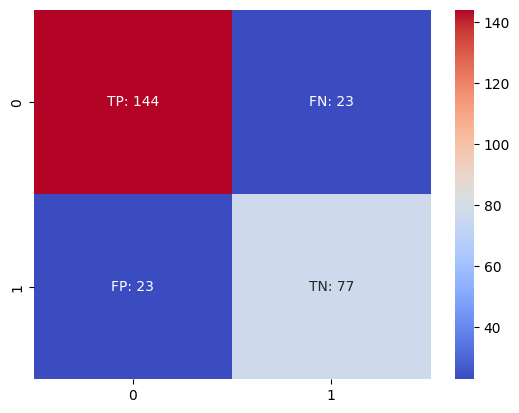

In [33]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

con_mat = confusion_matrix(y_test, y_pred)

group_names = ['TP', 'FN', 'FP', 'TN']
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
labels = [f"{v1}: {v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(con_mat, annot=labels, fmt='', cmap='coolwarm')

In [34]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.7528089887640449

Confusion Matrix: 
[[135  32]
 [ 34  66]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       167
           1       0.67      0.66      0.67       100

    accuracy                           0.75       267
   macro avg       0.74      0.73      0.74       267
weighted avg       0.75      0.75      0.75       267



In [35]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.7565543071161048

Confusion Matrix: 
[[138  29]
 [ 36  64]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       167
           1       0.69      0.64      0.66       100

    accuracy                           0.76       267
   macro avg       0.74      0.73      0.74       267
weighted avg       0.75      0.76      0.75       267



In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.7865168539325843

Confusion Matrix: 
[[139  28]
 [ 29  71]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.72      0.71      0.71       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [37]:
svr_model = SVC()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.8052434456928839

Confusion Matrix: 
[[141  26]
 [ 26  74]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       167
           1       0.74      0.74      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [38]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.7752808988764045

Confusion Matrix: 
[[134  33]
 [ 27  73]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       167
           1       0.69      0.73      0.71       100

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.76       267
weighted avg       0.78      0.78      0.78       267



### From the models Logistic Regression is best performing model.

